In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [116]:
df = pd.read_csv("train.csv")

In [117]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [118]:
test = pd.read_csv("test.csv")

In [119]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [120]:
print("shape of training data : ", df.shape)
print("shape of testing data : ", test.shape)

shape of training data :  (1460, 81)
shape of testing data :  (1459, 80)


In [121]:
null_precentages = df.isnull().sum() / df.shape[0] * 100

In [122]:
null_precentages = list(null_precentages)

In [123]:
for i in null_precentages:
    if i > 5:
        print(i)

17.73972602739726
93.76712328767123
59.726027397260275
47.26027397260274
5.5479452054794525
5.5479452054794525
5.5479452054794525
5.5479452054794525
5.5479452054794525
99.52054794520548
80.75342465753424
96.30136986301369


# METADATA
- **SalePrice**: The property's sale price in dollars. This is the target variable you're trying to predict.
- **MSSubClass**: The building class.
- **MSZoning**: The general zoning classification.
- **LotFrontage**: Linear feet of street connected to property.
- **LotArea**: Lot size in square feet.
- **Street**: Type of road access.
- **Alley**: Type of alley access.
- **LotShape**: General shape of property.
- **LandContour**: Flatness of the property.
- **Utilities**: Type of utilities available.
- **LotConfig**: Lot configuration.
- **LandSlope**: Slope of property.
- **Neighborhood**: Physical locations within Ames city limits.
- **Condition1**: Proximity to main road or railroad.
- **Condition2**: Proximity to main road or railroad (if a second is present).
- **BldgType**: Type of dwelling.
- **HouseStyle**: Style of dwelling.
- **OverallQual**: Overall material and finish quality.
- **OverallCond**: Overall condition rating.
- **YearBuilt**: Original construction date.
- **YearRemodAdd**: Remodel date.
- **RoofStyle**: Type of roof.
- **RoofMatl**: Roof material.
- **Exterior1st**: Exterior covering on house.
- **Exterior2nd**: Exterior covering on house (if more than one material).
- **MasVnrType**: Masonry veneer type.
- **MasVnrArea**: Masonry veneer area in square feet.
- **ExterQual**: Exterior material quality.
- **ExterCond**: Present condition of the material on the exterior.
- **Foundation**: Type of foundation.
- **BsmtQual**: Height of the basement.
- **BsmtCond**: General condition of the basement.
- **BsmtExposure**: Walkout or garden level basement walls.
- **BsmtFinType1**: Quality of basement finished area.
- **BsmtFinSF1**: Type 1 finished square feet.
- **BsmtFinType2**: Quality of second finished area (if present).
- **BsmtFinSF2**: Type 2 finished square feet.
- **BsmtUnfSF**: Unfinished square feet of basement area.
- **TotalBsmtSF**: Total square feet of basement area.
- **Heating**: Type of heating.
- **HeatingQC**: Heating quality and condition.
- **CentralAir**: Central air conditioning.
- **Electrical**: Electrical system.
- **1stFlrSF**: First floor square feet.
- **2ndFlrSF**: Second floor square feet.
- **LowQualFinSF**: Low-quality finished square feet (all floors).
- **GrLivArea**: Above grade (ground) living area square feet.
- **BsmtFullBath**: Basement full bathrooms.
- **BsmtHalfBath**: Basement half bathrooms.
- **FullBath**: Full bathrooms above grade.
- **HalfBath**: Half baths above grade.
- **Bedroom**: Number of bedrooms above basement level.
- **Kitchen**: Number of kitchens.
- **KitchenQual**: Kitchen quality.
- **TotRmsAbvGrd**: Total rooms above grade (does not include bathrooms).
- **Functional**: Home functionality rating.
- **Fireplaces**: Number of fireplaces.
- **FireplaceQu**: Fireplace quality.
- **GarageType**: Garage location.
- **GarageYrBlt**: Year garage was built.
- **GarageFinish**: Interior finish of the garage.
- **GarageCars**: Size of garage in car capacity.
- **GarageArea**: Size of garage in square feet.
- **GarageQual**: Garage quality.
- **GarageCond**: Garage condition.
- **PavedDrive**: Paved driveway.
- **WoodDeckSF**: Wood deck area in square feet.
- **OpenPorchSF**: Open porch area in square feet.
- **EnclosedPorch**: Enclosed porch area in square feet.
- **3SsnPorch**: Three-season porch area in square feet.
- **ScreenPorch**: Screen porch area in square feet.
- **PoolArea**: Pool area in square feet.
- **PoolQC**: Pool quality.
- **Fence**: Fence quality.
- **MiscFeature**: Miscellaneous feature not covered in other categories.
- **MiscVal**: $Value of miscellaneous feature.
- **MoSold**: Month sold.
- **YrSold**: Year sold.
- **SaleType**: Type of sale.
- **SaleCondition**: Condition of sale.


In [124]:
def unique(col_name):
    return df[col_name].unique()

def nunique(col_name):
    return df[col_name].nunique()

In [125]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [126]:
df.sample(6)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
967,968,20,RL,NaN,7390,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,135000
1072,1073,50,RL,50.0,7585,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2006,WD,Normal,91500
161,162,60,RL,110.0,13688,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2008,WD,Normal,412500
194,195,20,RL,60.0,7180,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,127000
1246,1247,60,FV,65.0,8125,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2006,New,Partial,186500
495,496,30,C (all),60.0,7879,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,11,2009,WD,Abnorml,34900


In [127]:
df['Utilities'].unique()

array(['AllPub', 'NoSeWa'], dtype=object)

In [128]:
df['Neighborhood'].unique()

array(['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst',
       'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes',
       'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert',
       'StoneBr', 'ClearCr', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU',
       'Blueste'], dtype=object)

In [129]:
df['Alley'].unique()

array([nan, 'Grvl', 'Pave'], dtype=object)

In [130]:
df['LotConfig'].unique()

array(['Inside', 'FR2', 'Corner', 'CulDSac', 'FR3'], dtype=object)

In [131]:
nunique_ = []
for i in df.columns:
    unique_count = df[i].nunique()  # Get the number of unique values
    dtype_str = str(df[i].dtype)  # Get the data type as a string
    print(f"{i} -> {unique_count} ({dtype_str})")  # Print the column name, unique count, and dtype
    nunique_.append([i, unique_count, dtype_str])  # Append results to the list


Id -> 1460 (int64)
MSSubClass -> 15 (int64)
MSZoning -> 5 (object)
LotFrontage -> 110 (float64)
LotArea -> 1073 (int64)
Street -> 2 (object)
Alley -> 2 (object)
LotShape -> 4 (object)
LandContour -> 4 (object)
Utilities -> 2 (object)
LotConfig -> 5 (object)
LandSlope -> 3 (object)
Neighborhood -> 25 (object)
Condition1 -> 9 (object)
Condition2 -> 8 (object)
BldgType -> 5 (object)
HouseStyle -> 8 (object)
OverallQual -> 10 (int64)
OverallCond -> 9 (int64)
YearBuilt -> 112 (int64)
YearRemodAdd -> 61 (int64)
RoofStyle -> 6 (object)
RoofMatl -> 8 (object)
Exterior1st -> 15 (object)
Exterior2nd -> 16 (object)
MasVnrType -> 3 (object)
MasVnrArea -> 327 (float64)
ExterQual -> 4 (object)
ExterCond -> 5 (object)
Foundation -> 6 (object)
BsmtQual -> 4 (object)
BsmtCond -> 4 (object)
BsmtExposure -> 4 (object)
BsmtFinType1 -> 6 (object)
BsmtFinSF1 -> 637 (int64)
BsmtFinType2 -> 6 (object)
BsmtFinSF2 -> 144 (int64)
BsmtUnfSF -> 780 (int64)
TotalBsmtSF -> 721 (int64)
Heating -> 6 (object)
HeatingQC

In [132]:
unique_less_than_10 = []
count = 0
for i in range(len(nunique_)):
    if nunique_[i][1] >= 10:
        print(nunique_[i])
        unique_less_than_10.append(nunique_[i])
        count += 1

['Id', 1460, 'int64']
['MSSubClass', 15, 'int64']
['LotFrontage', 110, 'float64']
['LotArea', 1073, 'int64']
['Neighborhood', 25, 'object']
['OverallQual', 10, 'int64']
['YearBuilt', 112, 'int64']
['YearRemodAdd', 61, 'int64']
['Exterior1st', 15, 'object']
['Exterior2nd', 16, 'object']
['MasVnrArea', 327, 'float64']
['BsmtFinSF1', 637, 'int64']
['BsmtFinSF2', 144, 'int64']
['BsmtUnfSF', 780, 'int64']
['TotalBsmtSF', 721, 'int64']
['1stFlrSF', 753, 'int64']
['2ndFlrSF', 417, 'int64']
['LowQualFinSF', 24, 'int64']
['GrLivArea', 861, 'int64']
['TotRmsAbvGrd', 12, 'int64']
['GarageYrBlt', 97, 'float64']
['GarageArea', 441, 'int64']
['WoodDeckSF', 274, 'int64']
['OpenPorchSF', 202, 'int64']
['EnclosedPorch', 120, 'int64']
['3SsnPorch', 20, 'int64']
['ScreenPorch', 76, 'int64']
['MiscVal', 21, 'int64']
['MoSold', 12, 'int64']
['SalePrice', 663, 'int64']


In [133]:
count 

30

In [134]:
categorical_cols_unique_less_than_10 = []
count = 0

for i in range(len(unique_less_than_10)):
    if unique_less_than_10[i][2] == "object":
        categorical_cols_unique_less_than_10.append(unique_less_than_10[i])
        print(unique_less_than_10[i][2])
        count += 1
    
print("count " , count)

object
object
object
count  3


In [135]:
categorical_cols_unique_less_than_10

[['Neighborhood', 25, 'object'],
 ['Exterior1st', 15, 'object'],
 ['Exterior2nd', 16, 'object']]

In [136]:
df['Neighborhood'].unique()

array(['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst',
       'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes',
       'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert',
       'StoneBr', 'ClearCr', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU',
       'Blueste'], dtype=object)

In [137]:
df['Exterior1st'].unique()

array(['VinylSd', 'MetalSd', 'Wd Sdng', 'HdBoard', 'BrkFace', 'WdShing',
       'CemntBd', 'Plywood', 'AsbShng', 'Stucco', 'BrkComm', 'AsphShn',
       'Stone', 'ImStucc', 'CBlock'], dtype=object)

In [138]:
df['Exterior2nd'].unique()

array(['VinylSd', 'MetalSd', 'Wd Shng', 'HdBoard', 'Plywood', 'Wd Sdng',
       'CmentBd', 'BrkFace', 'Stucco', 'AsbShng', 'Brk Cmn', 'ImStucc',
       'AsphShn', 'Stone', 'Other', 'CBlock'], dtype=object)

In [139]:
df['Exterior1st'].isnull().sum()

0

In [140]:
df['Exterior2nd'].isnull().sum()

0

In [141]:
df['Neighborhood'].isnull().sum()

0

In [142]:
df[df['Exterior1st'] == 'VinylSd'].shape

(515, 81)

<Axes: xlabel='Exterior1st'>

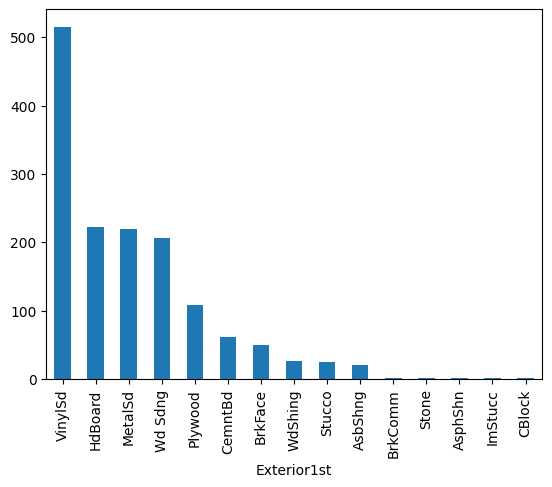

In [143]:
df['Exterior1st'].value_counts().plot(kind='bar')

<Axes: xlabel='Exterior2nd'>

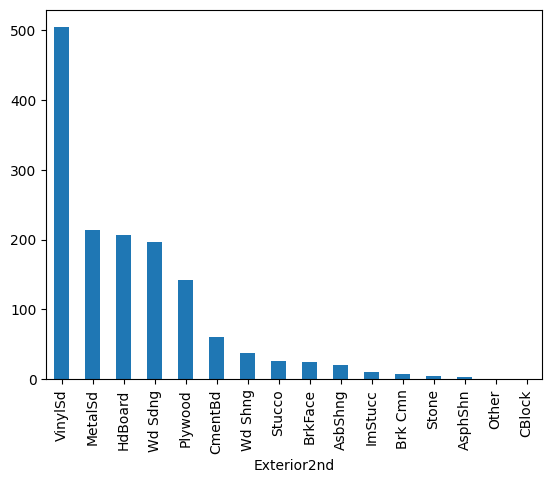

In [144]:
df['Exterior2nd'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

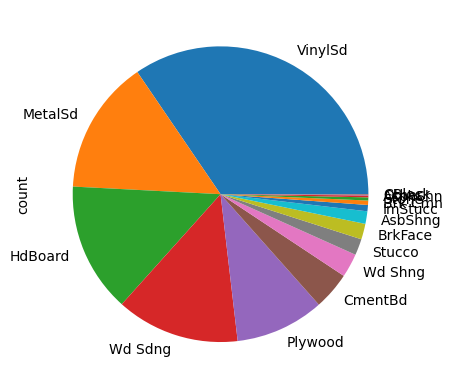

In [145]:
df['Exterior2nd'].value_counts().plot(kind='pie')

<Axes: ylabel='count'>

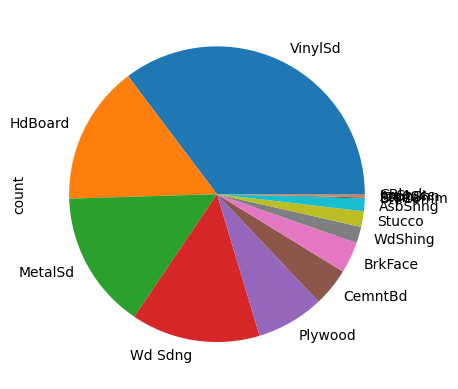

In [146]:
df['Exterior1st'].value_counts().plot(kind='pie')

In [147]:
values_2 = df['Exterior2nd'].value_counts()
values_1 = df['Exterior1st'].value_counts()

In [148]:
values_2

Exterior2nd
VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
Other        1
CBlock       1
Name: count, dtype: int64

In [149]:
df['Exterior2nd'] = df['Exterior2nd'].apply(lambda x: 'Other' if values_2[x] <= 10 else x)
df['Exterior1st'] = df['Exterior1st'].apply(lambda x: 'Other' if values_1[x] <= 10 else x)

In [150]:
df['Exterior2nd'].value_counts()

Exterior2nd
VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Other       27
Stucco      26
BrkFace     25
AsbShng     20
Name: count, dtype: int64

In [108]:
from sklearn.decomposition import PCA

In [109]:
pca = PCA()

In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [155]:
unique_less_than_10.pop(0)

['Id', 1460, 'int64']

In [156]:
unique_less_than_10

[['MSSubClass', 15, 'int64'],
 ['LotFrontage', 110, 'float64'],
 ['LotArea', 1073, 'int64'],
 ['Neighborhood', 25, 'object'],
 ['OverallQual', 10, 'int64'],
 ['YearBuilt', 112, 'int64'],
 ['YearRemodAdd', 61, 'int64'],
 ['Exterior1st', 15, 'object'],
 ['Exterior2nd', 16, 'object'],
 ['MasVnrArea', 327, 'float64'],
 ['BsmtFinSF1', 637, 'int64'],
 ['BsmtFinSF2', 144, 'int64'],
 ['BsmtUnfSF', 780, 'int64'],
 ['TotalBsmtSF', 721, 'int64'],
 ['1stFlrSF', 753, 'int64'],
 ['2ndFlrSF', 417, 'int64'],
 ['LowQualFinSF', 24, 'int64'],
 ['GrLivArea', 861, 'int64'],
 ['TotRmsAbvGrd', 12, 'int64'],
 ['GarageYrBlt', 97, 'float64'],
 ['GarageArea', 441, 'int64'],
 ['WoodDeckSF', 274, 'int64'],
 ['OpenPorchSF', 202, 'int64'],
 ['EnclosedPorch', 120, 'int64'],
 ['3SsnPorch', 20, 'int64'],
 ['ScreenPorch', 76, 'int64'],
 ['MiscVal', 21, 'int64'],
 ['MoSold', 12, 'int64']]

In [ ]:
cols_to_label_encode = []

for i in 

In [157]:
unique_count

663

In [167]:
categorical_cols = []

for i in range(len(nunique_)):
    if nunique_[i][2] == "object":
        categorical_cols.append(nunique_[i][0:2])

In [168]:
categorical_cols

[['MSZoning', 5],
 ['Street', 2],
 ['Alley', 2],
 ['LotShape', 4],
 ['LandContour', 4],
 ['Utilities', 2],
 ['LotConfig', 5],
 ['LandSlope', 3],
 ['Neighborhood', 25],
 ['Condition1', 9],
 ['Condition2', 8],
 ['BldgType', 5],
 ['HouseStyle', 8],
 ['RoofStyle', 6],
 ['RoofMatl', 8],
 ['Exterior1st', 15],
 ['Exterior2nd', 16],
 ['MasVnrType', 3],
 ['ExterQual', 4],
 ['ExterCond', 5],
 ['Foundation', 6],
 ['BsmtQual', 4],
 ['BsmtCond', 4],
 ['BsmtExposure', 4],
 ['BsmtFinType1', 6],
 ['BsmtFinType2', 6],
 ['Heating', 6],
 ['HeatingQC', 5],
 ['CentralAir', 2],
 ['Electrical', 5],
 ['KitchenQual', 4],
 ['Functional', 7],
 ['FireplaceQu', 5],
 ['GarageType', 6],
 ['GarageFinish', 3],
 ['GarageQual', 5],
 ['GarageCond', 5],
 ['PavedDrive', 3],
 ['PoolQC', 3],
 ['Fence', 4],
 ['MiscFeature', 4],
 ['SaleType', 9],
 ['SaleCondition', 6]]

In [171]:
categorical_cols_less_10 = []

for i in categorical_cols:
    if i[1] < 10:
        categorical_cols_less_10.append(i)

In [172]:
categorical_cols_less_10

[['MSZoning', 5],
 ['Street', 2],
 ['Alley', 2],
 ['LotShape', 4],
 ['LandContour', 4],
 ['Utilities', 2],
 ['LotConfig', 5],
 ['LandSlope', 3],
 ['Condition1', 9],
 ['Condition2', 8],
 ['BldgType', 5],
 ['HouseStyle', 8],
 ['RoofStyle', 6],
 ['RoofMatl', 8],
 ['MasVnrType', 3],
 ['ExterQual', 4],
 ['ExterCond', 5],
 ['Foundation', 6],
 ['BsmtQual', 4],
 ['BsmtCond', 4],
 ['BsmtExposure', 4],
 ['BsmtFinType1', 6],
 ['BsmtFinType2', 6],
 ['Heating', 6],
 ['HeatingQC', 5],
 ['CentralAir', 2],
 ['Electrical', 5],
 ['KitchenQual', 4],
 ['Functional', 7],
 ['FireplaceQu', 5],
 ['GarageType', 6],
 ['GarageFinish', 3],
 ['GarageQual', 5],
 ['GarageCond', 5],
 ['PavedDrive', 3],
 ['PoolQC', 3],
 ['Fence', 4],
 ['MiscFeature', 4],
 ['SaleType', 9],
 ['SaleCondition', 6]]

In [175]:
for i in categorical_cols_less_10:
    print(f"{i[0]} : {df[i[0]].unique()}")
    print("-------------------------------------------------------------------------")

MSZoning : ['RL' 'RM' 'C (all)' 'FV' 'RH']
-------------------------------------------------------------------------
Street : ['Pave' 'Grvl']
-------------------------------------------------------------------------
Alley : [nan 'Grvl' 'Pave']
-------------------------------------------------------------------------
LotShape : ['Reg' 'IR1' 'IR2' 'IR3']
-------------------------------------------------------------------------
LandContour : ['Lvl' 'Bnk' 'Low' 'HLS']
-------------------------------------------------------------------------
Utilities : ['AllPub' 'NoSeWa']
-------------------------------------------------------------------------
LotConfig : ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
-------------------------------------------------------------------------
LandSlope : ['Gtl' 'Mod' 'Sev']
-------------------------------------------------------------------------
Condition1 : ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
------------------------------------

In [177]:
categorical_cols

[['MSZoning', 5],
 ['Street', 2],
 ['Alley', 2],
 ['LotShape', 4],
 ['LandContour', 4],
 ['Utilities', 2],
 ['LotConfig', 5],
 ['LandSlope', 3],
 ['Neighborhood', 25],
 ['Condition1', 9],
 ['Condition2', 8],
 ['BldgType', 5],
 ['HouseStyle', 8],
 ['RoofStyle', 6],
 ['RoofMatl', 8],
 ['Exterior1st', 15],
 ['Exterior2nd', 16],
 ['MasVnrType', 3],
 ['ExterQual', 4],
 ['ExterCond', 5],
 ['Foundation', 6],
 ['BsmtQual', 4],
 ['BsmtCond', 4],
 ['BsmtExposure', 4],
 ['BsmtFinType1', 6],
 ['BsmtFinType2', 6],
 ['Heating', 6],
 ['HeatingQC', 5],
 ['CentralAir', 2],
 ['Electrical', 5],
 ['KitchenQual', 4],
 ['Functional', 7],
 ['FireplaceQu', 5],
 ['GarageType', 6],
 ['GarageFinish', 3],
 ['GarageQual', 5],
 ['GarageCond', 5],
 ['PavedDrive', 3],
 ['PoolQC', 3],
 ['Fence', 4],
 ['MiscFeature', 4],
 ['SaleType', 9],
 ['SaleCondition', 6]]

In [184]:
categorical_cols_with_null_values = []

for col in categorical_cols:
    if df[col].isnull().any():  # Check if there are any null values in the column
        categorical_cols_with_null_values.append(col)


KeyError: '[5] not in index'

In [183]:
categorical_cols_with_null_values

[]

In [185]:
categorical_cols

[['MSZoning', 5],
 ['Street', 2],
 ['Alley', 2],
 ['LotShape', 4],
 ['LandContour', 4],
 ['Utilities', 2],
 ['LotConfig', 5],
 ['LandSlope', 3],
 ['Neighborhood', 25],
 ['Condition1', 9],
 ['Condition2', 8],
 ['BldgType', 5],
 ['HouseStyle', 8],
 ['RoofStyle', 6],
 ['RoofMatl', 8],
 ['Exterior1st', 15],
 ['Exterior2nd', 16],
 ['MasVnrType', 3],
 ['ExterQual', 4],
 ['ExterCond', 5],
 ['Foundation', 6],
 ['BsmtQual', 4],
 ['BsmtCond', 4],
 ['BsmtExposure', 4],
 ['BsmtFinType1', 6],
 ['BsmtFinType2', 6],
 ['Heating', 6],
 ['HeatingQC', 5],
 ['CentralAir', 2],
 ['Electrical', 5],
 ['KitchenQual', 4],
 ['Functional', 7],
 ['FireplaceQu', 5],
 ['GarageType', 6],
 ['GarageFinish', 3],
 ['GarageQual', 5],
 ['GarageCond', 5],
 ['PavedDrive', 3],
 ['PoolQC', 3],
 ['Fence', 4],
 ['MiscFeature', 4],
 ['SaleType', 9],
 ['SaleCondition', 6]]

In [187]:
null_percentage_categorical = []

for i in categorical_cols:
    null_pre = df[i[0]].isnull().sum() / df.shape[0] * 100
    null_percentage_categorical.append([i[0], null_pre])

In [188]:
null_percentage_categorical

[['MSZoning', 0.0],
 ['Street', 0.0],
 ['Alley', 93.76712328767123],
 ['LotShape', 0.0],
 ['LandContour', 0.0],
 ['Utilities', 0.0],
 ['LotConfig', 0.0],
 ['LandSlope', 0.0],
 ['Neighborhood', 0.0],
 ['Condition1', 0.0],
 ['Condition2', 0.0],
 ['BldgType', 0.0],
 ['HouseStyle', 0.0],
 ['RoofStyle', 0.0],
 ['RoofMatl', 0.0],
 ['Exterior1st', 0.0],
 ['Exterior2nd', 0.0],
 ['MasVnrType', 59.726027397260275],
 ['ExterQual', 0.0],
 ['ExterCond', 0.0],
 ['Foundation', 0.0],
 ['BsmtQual', 2.5342465753424657],
 ['BsmtCond', 2.5342465753424657],
 ['BsmtExposure', 2.6027397260273974],
 ['BsmtFinType1', 2.5342465753424657],
 ['BsmtFinType2', 2.6027397260273974],
 ['Heating', 0.0],
 ['HeatingQC', 0.0],
 ['CentralAir', 0.0],
 ['Electrical', 0.0684931506849315],
 ['KitchenQual', 0.0],
 ['Functional', 0.0],
 ['FireplaceQu', 47.26027397260274],
 ['GarageType', 5.5479452054794525],
 ['GarageFinish', 5.5479452054794525],
 ['GarageQual', 5.5479452054794525],
 ['GarageCond', 5.5479452054794525],
 ['PavedD

In [189]:
categorical_null_values = []

for i in null_percentage_categorical:
    if i[1] > 0:
        categorical_null_values.append(i)

In [190]:
categorical_null_values

[['Alley', 93.76712328767123],
 ['MasVnrType', 59.726027397260275],
 ['BsmtQual', 2.5342465753424657],
 ['BsmtCond', 2.5342465753424657],
 ['BsmtExposure', 2.6027397260273974],
 ['BsmtFinType1', 2.5342465753424657],
 ['BsmtFinType2', 2.6027397260273974],
 ['Electrical', 0.0684931506849315],
 ['FireplaceQu', 47.26027397260274],
 ['GarageType', 5.5479452054794525],
 ['GarageFinish', 5.5479452054794525],
 ['GarageQual', 5.5479452054794525],
 ['GarageCond', 5.5479452054794525],
 ['PoolQC', 99.52054794520548],
 ['Fence', 80.75342465753424],
 ['MiscFeature', 96.30136986301369]]

In [192]:
for i in categorical_null_values:
    print(f"{i[0]} , {i[1]} , {df[i[0]].unique()}")
    print("------------------------------------------------------------")

Alley , 93.76712328767123 , [nan 'Grvl' 'Pave']
------------------------------------------------------------
MasVnrType , 59.726027397260275 , ['BrkFace' nan 'Stone' 'BrkCmn']
------------------------------------------------------------
BsmtQual , 2.5342465753424657 , ['Gd' 'TA' 'Ex' nan 'Fa']
------------------------------------------------------------
BsmtCond , 2.5342465753424657 , ['TA' 'Gd' nan 'Fa' 'Po']
------------------------------------------------------------
BsmtExposure , 2.6027397260273974 , ['No' 'Gd' 'Mn' 'Av' nan]
------------------------------------------------------------
BsmtFinType1 , 2.5342465753424657 , ['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' nan 'LwQ']
------------------------------------------------------------
BsmtFinType2 , 2.6027397260273974 , ['Unf' 'BLQ' nan 'ALQ' 'Rec' 'LwQ' 'GLQ']
------------------------------------------------------------
Electrical , 0.0684931506849315 , ['SBrkr' 'FuseF' 'FuseA' 'FuseP' 'Mix' nan]
----------------------------------------------

In [214]:
categorical_null_less_10 = []

for i in categorical_null_values:
    if i[1] < 10:
        categorical_null_less_10.append(i)

In [215]:
categorical_null_less_10

[['BsmtQual', 2.5342465753424657],
 ['BsmtCond', 2.5342465753424657],
 ['BsmtExposure', 2.6027397260273974],
 ['BsmtFinType1', 2.5342465753424657],
 ['BsmtFinType2', 2.6027397260273974],
 ['Electrical', 0.0684931506849315],
 ['GarageType', 5.5479452054794525],
 ['GarageFinish', 5.5479452054794525],
 ['GarageQual', 5.5479452054794525],
 ['GarageCond', 5.5479452054794525]]

In [216]:
for i in categorical_null_less_10:
    
    mode_value = df[i[0]].mode()[0]
    
    df[i[0]].fillna(mode_value, inplace = True)

C:\Users\manit\AppData\Local\Temp\ipykernel_40532\1618827589.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i[0]].fillna(mode_value, inplace = True)


In [208]:
categorical_null_more_45 = []

for i in categorical_null_values:
    if i[1] > 45:
        categorical_null_more_45.append(i)


In [209]:
categorical_null_more_45

[['Alley', 93.76712328767123],
 ['MasVnrType', 59.726027397260275],
 ['FireplaceQu', 47.26027397260274],
 ['PoolQC', 99.52054794520548],
 ['Fence', 80.75342465753424],
 ['MiscFeature', 96.30136986301369]]

In [210]:
for i in categorical_null_more_45:
    print(f"{i[0]} : {df[i[0]].unique()}")

Alley : ['unkown' 'Grvl' 'Pave']
MasVnrType : ['BrkFace' nan 'Stone' 'BrkCmn']
FireplaceQu : [nan 'TA' 'Gd' 'Fa' 'Ex' 'Po']
PoolQC : ['unkown' 'Ex' 'Fa' 'Gd']
Fence : [nan 'MnPrv' 'GdWo' 'GdPrv' 'MnWw']
MiscFeature : ['unkown' 'Shed' 'Gar2' 'Othr' 'TenC']


In [211]:
for i in categorical_null_more_45:
    print(df[i[0]].value_counts())

Alley
unkown    1369
Grvl        50
Pave        41
Name: count, dtype: int64
MasVnrType
BrkFace    445
Stone      128
BrkCmn      15
Name: count, dtype: int64
FireplaceQu
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: count, dtype: int64
PoolQC
unkown    1453
Gd           3
Ex           2
Fa           2
Name: count, dtype: int64
Fence
MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: count, dtype: int64
MiscFeature
unkown    1406
Shed        49
Gar2         2
Othr         2
TenC         1
Name: count, dtype: int64


In [212]:
for i in categorical_null_more_45:
    df[i[0]].fillna('unkown', inplace = True)

C:\Users\manit\AppData\Local\Temp\ipykernel_40532\4038456878.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i[0]].fillna('unkown', inplace = True)


In [213]:
df.isnull().sum().sum()

672

In [217]:
null = 0
for i in categorical_cols:
    null += df[i[0]].isnull().sum()

In [218]:
null

0

In [222]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [223]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [228]:
numerical_cols = []

for i in df.columns:
    if df[i].dtype != 'object':
        null_value = df[i].isnull().sum() / df.shape[0] * 100
        numerical_cols.append([i, null_value])

In [229]:
numerical_cols

[['Id', 0.0],
 ['MSSubClass', 0.0],
 ['LotFrontage', 17.73972602739726],
 ['LotArea', 0.0],
 ['OverallQual', 0.0],
 ['OverallCond', 0.0],
 ['YearBuilt', 0.0],
 ['YearRemodAdd', 0.0],
 ['MasVnrArea', 0.547945205479452],
 ['BsmtFinSF1', 0.0],
 ['BsmtFinSF2', 0.0],
 ['BsmtUnfSF', 0.0],
 ['TotalBsmtSF', 0.0],
 ['1stFlrSF', 0.0],
 ['2ndFlrSF', 0.0],
 ['LowQualFinSF', 0.0],
 ['GrLivArea', 0.0],
 ['BsmtFullBath', 0.0],
 ['BsmtHalfBath', 0.0],
 ['FullBath', 0.0],
 ['HalfBath', 0.0],
 ['BedroomAbvGr', 0.0],
 ['KitchenAbvGr', 0.0],
 ['TotRmsAbvGrd', 0.0],
 ['Fireplaces', 0.0],
 ['GarageYrBlt', 5.5479452054794525],
 ['GarageCars', 0.0],
 ['GarageArea', 0.0],
 ['WoodDeckSF', 0.0],
 ['OpenPorchSF', 0.0],
 ['EnclosedPorch', 0.0],
 ['3SsnPorch', 0.0],
 ['ScreenPorch', 0.0],
 ['PoolArea', 0.0],
 ['MiscVal', 0.0],
 ['MoSold', 0.0],
 ['YrSold', 0.0],
 ['SalePrice', 0.0]]

In [230]:
numerical_null_values = []

for i in numerical_cols:
    if i[1] > 0:
        numerical_null_values.append(i)

In [231]:
numerical_null_values

[['LotFrontage', 17.73972602739726],
 ['MasVnrArea', 0.547945205479452],
 ['GarageYrBlt', 5.5479452054794525]]

In [234]:
for i in numerical_null_values:
    mean = df[i[0]].mean()
    
    df[i[0]].fillna(mean, inplace = True)

C:\Users\manit\AppData\Local\Temp\ipykernel_40532\1149957924.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i[0]].fillna(mean, inplace = True)


In [237]:
df.isnull().sum().sum()

0

In [241]:
columns_to_label_encode = []
for i in categorical_cols_less_10:
    columns_to_label_encode.append(i[0])

In [242]:
columns_to_label_encode

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [243]:
from sklearn.preprocessing import LabelEncoder

In [244]:
encoder = LabelEncoder()

In [245]:
df_copy = df.copy()

In [246]:
for col in columns_to_label_encode:
    df[col] = encoder.fit_transform(df[col])

In [255]:
categorical_cols_more_than_10 = []

for i in categorical_cols:
    if i[1] > 10:
        categorical_cols_more_than_10.append(i[0])

In [256]:
categorical_cols_more_than_10

['Neighborhood', 'Exterior1st', 'Exterior2nd']

In [259]:
df_encoded = pd.get_dummies(df,columns=categorical_cols_more_than_10, dtype=int)

In [260]:
df_encoded

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Exterior2nd_BrkFace,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng
0,1,60,3,65.0,8450,1,2,3,3,0,...,0,0,0,0,0,0,0,1,0,0
1,2,20,3,80.0,9600,1,2,3,3,0,...,0,0,0,1,0,0,0,0,0,0
2,3,60,3,68.0,11250,1,2,0,3,0,...,0,0,0,0,0,0,0,1,0,0
3,4,70,3,60.0,9550,1,2,0,3,0,...,0,0,0,0,0,0,0,0,0,1
4,5,60,3,84.0,14260,1,2,0,3,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,3,62.0,7917,1,2,3,3,0,...,0,0,0,0,0,0,0,1,0,0
1456,1457,20,3,85.0,13175,1,2,3,3,0,...,0,0,0,0,0,1,0,0,0,0
1457,1458,70,3,66.0,9042,1,2,3,3,0,...,0,1,0,0,0,0,0,0,0,0
1458,1459,20,3,68.0,9717,1,2,3,3,0,...,0,0,0,1,0,0,0,0,0,0


In [261]:
df['SalePrice']

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [262]:
df_encoded['SalePrice']

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [263]:
y = df_encoded['SalePrice']

In [264]:
x = df_encoded.drop("SalePrice", axis = 1)

In [266]:
from sklearn.decomposition import PCA

In [305]:
pca = PCA(n_components=50)

In [306]:
from sklearn.model_selection import train_test_split

In [307]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state= 33)

In [308]:
x_train_pca = pca.fit_transform(x_train)

In [309]:
x_test_pca = pca.transform(x_test)

In [310]:
from sklearn.linear_model import LinearRegression

In [311]:
linear_regression = LinearRegression()

In [312]:
linear_regression.fit(x_train, y_train)

LinearRegression()

In [313]:
y_pred_pca = linear_regression.predict(x_test)

In [314]:
from sklearn.metrics import r2_score, mean_squared_error

In [315]:
r2_score(y_pred_pca, y_test)

0.7552076180304194

In [316]:
mean_squared_error(y_pred, y_test)

1565838872.1616616

In [317]:
from sklearn.preprocessing import StandardScaler

In [318]:
scaler = StandardScaler()

In [319]:
x_train_pca_scaled = scaler.fit_transform(x_train_pca)

In [320]:
x_test_pca_scaled = scaler.transform(x_test_pca)

In [321]:
lr = LinearRegression()

In [322]:
lr.fit(x_train_pca_scaled, y_train)

LinearRegression()

In [323]:
y_pred_pca_scaled = lr.predict(x_test_pca_scaled)

In [324]:
r2_score(y_pred_pca_scaled, y_test)

0.6854661110520013

In [325]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [326]:
lr.fit(x_train_scaled, y_train)

LinearRegression()

In [327]:
y_pred_scaled = lr.predict(x_test_scaled)

In [328]:
r2_score(y_pred_scaled, y_test)

0.7551735864288164

In [329]:
x_train_scaled_pca = pca.fit_transform(x_train_scaled)
x_test_scaled_pca = pca.transform(x_test_scaled)

In [330]:
lr.fit(x_train_scaled_pca, y_train)


LinearRegression()

In [331]:
y_pred_scaled_pca = lr.predict(x_test_scaled_pca)

In [332]:
r2_score(y_pred_scaled_pca, y_test)

0.7129521475486265

In [333]:

lr.fit(x_train, y_train)

LinearRegression()

In [334]:
y_pred = lr.predict(x_test)

In [335]:
r2_score(y_pred, y_test)

0.7552076180304194

In [336]:
from sklearn.model_selection import GridSearchCV

In [338]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    ('pca', PCA()),  # PCA to reduce dimensions
    ('linear', LinearRegression())  # Linear Regression to solve the model
])

# Define the parameter grid for GridSearchCV
param_grid = {
    'pca__n_components': np.arange(1, x.shape[1] + 1, 5)  # Test from 1 to the number of features
}

# Set up GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')

In [339]:
grid_search

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('pca', PCA()),
                                       ('linear', LinearRegression())]),
             param_grid={'pca__n_components': array([  1,   6,  11,  16,  21,  26,  31,  36,  41,  46,  51,  56,  61,
        66,  71,  76,  81,  86,  91,  96, 101, 106, 111, 116, 121])},
             scoring='neg_mean_squared_error')

In [ ]:
grid_search.fit(x, y)

# Get the best number of components for PCA
best_n_components = grid_search.best_params_['pca__n_components']

print("Best number of PCA components:", best_n_components)